## A.I. Assignment 4

## Learning Goals

By the end of this lab, you should be able to:
* Get familiar with tensors in pytorch
* Get familiar with the activation functions for ANN 
* Create a simple perceptron model with pytorch



## Common activation functions for ANN:

##### Sigmoid:

The sigmoid function is a popular choice for activation functions in neural networks. It has an $S-shaped$ curve:
$$f(x) = \frac{1}{1+e^{-x}}.$$

It has a number of appealing qualities:

1. *Nonlinearity*: Because the sigmoid function is nonlinear, it enables the neural network to simulate nonlinear interactions between inputs and outputs. A neural network would simply be a linear model without a nonlinear activation function like sigmoid, which would significantly restrict its capacity to describe complex relationships.

1. *Smoothness*: As the sigmoid function is differentiable and smooth, its derivative exist at every point. This is significant because it makes it possible for neural network training techniques based on gradients (such as backpropagation) to perform well.

1. *Boundedness*: The sigmoid function is bounded between 0 and 1, it means  its outputs can be interpreted as probabilities.  It is most useful in applications like binary classification, where the goal is to predict whether an input belongs to one of two classes.

1. *Monotonicity*: The sigmoid function is monotonic, which means that its outputs are always increasing or always decreasing with respect to its inputs. This makes it easy to interpret the effect of changes in input variables on the output of the network.

##### ReLU (Rectified Linear Unit):

The ReLU function is defined as $$f(x) = max(0, x).$$

It is a widely used activation function in deep learning due to its simplicity and effectiveness.

##### Tanh (Hyperbolic Tangent):

The $\tanh$ function is similar to the sigmoid function but produces outputs in the interval $[-1, 1]$:  
$$f(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}.$$

##### Softmax:

The softmax function is commonly used in the output layer of a neural network for multi-class classification problems. It normalizes the output into a probability distribution over the classes.

Given a vector $\vec{z}$ of $n$ real numbers, the softmax function calculates a vector $\vec{s}$ of $n$ real numbers with the components:
$$s_j = \frac{e^{z_j}}{\sum_{k=1}^{n} {e^{z_k}}}.$$


##### Leaky ReLU:

The Leaky ReLU is a variation of the ReLU function that introduces a small non-zero gradient for negative inputs. It is defined as 
$$f(x) = max(0.01 \cdot x, x).$$

##### ELU (Exponential Linear Unit):

The ELU function is another variation of the ReLU function that introduces a small negative saturation value for negative inputs. It is defined as 

$$ f(x) = \biggl\{ \begin{matrix} x, & for & x > 0 \\
                      \alpha \cdot (e^{x} - 1), & for & x \leq 0 \end{matrix}$$
where $\alpha$ is a hyperparameter.

##### Swish:

The Swish function is a recent activation function that is a smooth approximation of the ReLU function. It is defined as f(x) = x * sigmoid(x).

In [1]:
import torch

if torch.cuda.is_available():
    my_device = torch.device('cuda')
else:
    my_device = torch.device('cpu')
print('Device: {}'.format(my_device))

x = torch.rand(2, 2, device=my_device)
print(x)

Device: cuda
tensor([[0.1026, 0.0562],
        [0.1852, 0.3218]], device='cuda:0')


create a tensor with requires_grad=True to tell PyTorch to track gradients for this tensor:

In [2]:
x = torch.tensor([2.0], requires_grad=True)
print(x)

tensor([2.], requires_grad=True)


You can perform any operations on this tensor as usual:

In [3]:
y = x ** 2 + 2 * x + 1
print(y)

tensor([9.], grad_fn=<AddBackward0>)


To compute the gradients of y with respect to x, you need to call backward() on y:

In [4]:
y.backward()

In [5]:
x.grad

tensor([6.])

In [6]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor([1., 2., 3.], requires_grad=True)

# Compute a function of x
y = x.sum()

# Compute gradients of y with respect to x
y.backward()

# Print gradients of x
print(x.grad)


tensor([1., 1., 1.])


Exercise 1.

Compute the gradient for the sigmoid activation function in 2 points using pytorch and check it with the known explicit formula 

In [7]:
import torch
import math

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

x1 = torch.tensor(2.0, requires_grad=True)
x2 = torch.tensor(-3.0, requires_grad=True)

y1 = sigmoid(x1)
y2 = sigmoid(x2)

y1.backward()
y2.backward()

grad1 = x1.grad.item()
grad2 = x2.grad.item()

def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

explicit_grad1 = sigmoid_grad(x1).item()
explicit_grad2 = sigmoid_grad(x2).item()

print("Gradient at x1 (PyTorch):", grad1)
print("Gradient at x1 (Explicit formula):", explicit_grad1)
print("Gradient at x2 (PyTorch):", grad2)
print("Gradient at x2 (Explicit formula):", explicit_grad2)


Gradient at x1 (PyTorch): 0.10499356687068939
Gradient at x1 (Explicit formula): 0.10499362647533417
Gradient at x2 (PyTorch): 0.045176658779382706
Gradient at x2 (Explicit formula): 0.045176658779382706


Exercise 2.

Compute the gradient for the linear activation function in 2 points using pytorch and check it with the known explicit formula

In [8]:
import torch

def lin(x):
    return x

x1 = torch.tensor(2.0, requires_grad=True)
x2 = torch.tensor(-3.0, requires_grad=True)

y1 = lin(x1)
y2 = lin(x2)

y1.backward()
y2.backward()

grad1 = x1.grad.item()
grad2 = x2.grad.item()

def lin_grad(x):
    return torch.tensor(1.0)

explicit_grad1 = lin_grad(x1).item()
explicit_grad2 = lin_grad(x2).item()

print("Gradient at x1 (PyTorch):", grad1)
print("Gradient at x1 (Explicit formula):", explicit_grad1)
print("Gradient at x2 (PyTorch):", grad2)
print("Gradient at x2 (Explicit formula):", explicit_grad2)


Gradient at x1 (PyTorch): 1.0
Gradient at x1 (Explicit formula): 1.0
Gradient at x2 (PyTorch): 1.0
Gradient at x2 (Explicit formula): 1.0


Execise 3.

Compute the gradient for the relu activation function in 2 points using pytorch and check it with the known explicit formula.

In [9]:
import torch

def relu(x):
    return torch.max(torch.tensor(0.0), x)

x1 = torch.tensor(3.0, requires_grad=True)
x2 = torch.tensor(-3.0, requires_grad=True)

y1 = relu(x1)
y2 = relu(x2)

y1.backward()
y2.backward()

grad1 = x1.grad.item()
grad2 = x2.grad.item()

def relu_grad(x):
    return torch.tensor(1.0) if x > 0 else torch.tensor(0.0)

explicit_grad1 = relu_grad(x1).item()
explicit_grad2 = relu_grad(x2).item()

print("Gradient at x1 (PyTorch):", grad1)
print("Gradient at x1 (Explicit formula):", explicit_grad1)
print("Gradient at x2 (PyTorch):", grad2)
print("Gradient at x2 (Explicit formula):", explicit_grad2)


Gradient at x1 (PyTorch): 1.0
Gradient at x1 (Explicit formula): 1.0
Gradient at x2 (PyTorch): 0.0
Gradient at x2 (Explicit formula): 0.0


Exercise 4. 

Write in python a function to plot the sigmoid activation function and its gradient using matplotlib

Gradient at x1 (PyTorch): 0.10499358177185059
Gradient at x1 (Explicit formula): 0.10499362647533417
Gradient at x2 (PyTorch): 0.045176662504673004
Gradient at x2 (Explicit formula): 0.045176662504673004


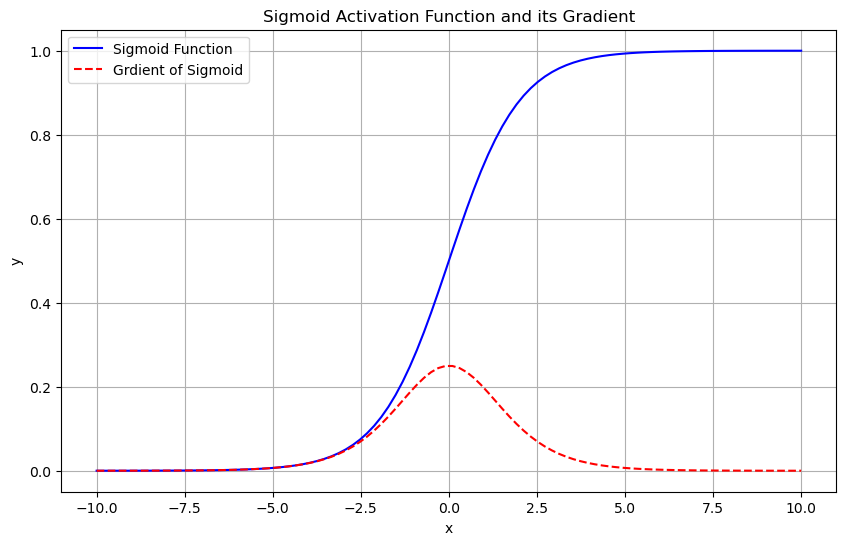

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + math.e**(-x))

x1 = torch.tensor(2.0, requires_grad=True)
x2 = torch.tensor(-3.0, requires_grad=True)

y1 = sigmoid(x1)
y2 = sigmoid(x2)

y1.backward()
y2.backward()

grad1 = x1.grad.item()
grad2 = x2.grad.item()

def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

explicit_grad1 = sigmoid_grad(x1).item()
explicit_grad2 = sigmoid_grad(x2).item()

# Compare the gradients
print("Gradient at x1 (PyTorch):", grad1)
print("Gradient at x1 (Explicit formula):", explicit_grad1)
print("Gradient at x2 (PyTorch):", grad2)
print("Gradient at x2 (Explicit formula):", explicit_grad2)

x=np.linspace(-10,10,100)
y_sigmoid=sigmoid(x)
y_grad=sigmoid_grad(x)

plt.figure(figsize=(10,6))
plt.plot(x,y_sigmoid,label='Sigmoid Function',color='blue')

plt.plot(x,y_grad,label='Grdient of Sigmoid',color='red',linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sigmoid Activation Function and its Gradient')
plt.legend()
plt.grid(True)
plt.show()

Exercise 5. 

Write in python a function to plot the ReLU activation function and its gradient using matplotlib.

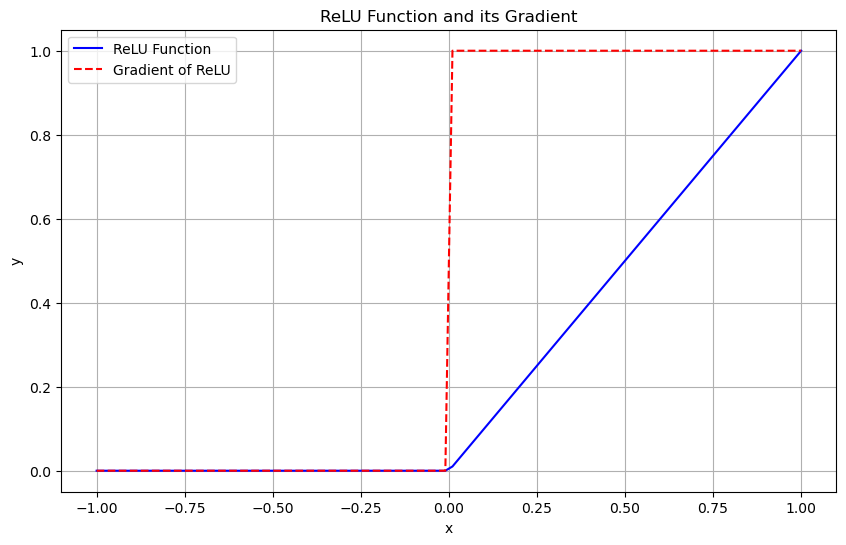

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(x, 0)

def relu_grad(x):
    return np.where(x > 0, 1, 0)

x = np.linspace(-1, 1, 100)
y_relu = relu(x)
y_grad = relu_grad(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_relu, label='ReLU Function', color='blue')
plt.plot(x, y_grad, label='Gradient of ReLU', color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('ReLU Function and its Gradient')
plt.legend()
plt.grid(True)
plt.show()


Exercise 6. 

Write in python a function to plot the tanh activation function and its gradient using matplotlib.

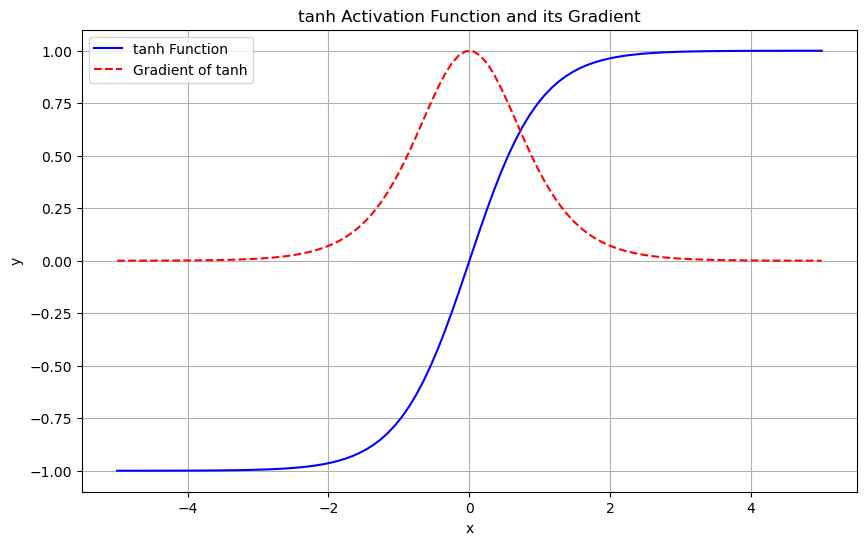

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return (math.e**x-math.e**(-x))/(math.e**x+math.e**(-x))
    #return np.tanh(x)

def tanh_gradient(x):
    return 1 - ((math.e**x-math.e**(-x))/(math.e**x+math.e**(-x)))**2
    #return 1 - np.tanh(x)**2

x = np.linspace(-5, 5, 100)
y_tanh = tanh(x)
y_gradient = tanh_gradient(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_tanh, label='tanh Function', color='blue')
plt.plot(x, y_gradient, label='Gradient of tanh', color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('tanh Activation Function and its Gradient')
plt.legend()
plt.grid(True)
plt.show()


Exercise 7. 

Write in python a function to plot the leaky ReLU activation function and its gradient using matplotlib.

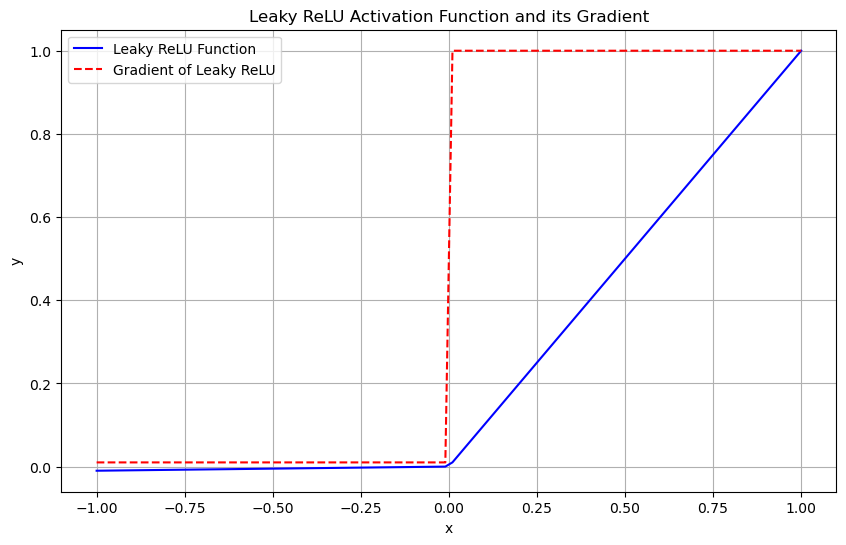

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_gradient(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

x = np.linspace(-1, 1, 100)
y_leaky_relu = leaky_relu(x)
y_gradient = leaky_relu_gradient(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_leaky_relu, label='Leaky ReLU Function', color='blue')
plt.plot(x, y_gradient, label='Gradient of Leaky ReLU', color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Leaky ReLU Activation Function and its Gradient')
plt.legend()
plt.grid(True)
plt.show()


## Perceptron

We define a class called *Perceptron* that inherits from *torch.nn.Module*. 

In the constructor, we define a single fully-connected linear layer with $input_dim$ inputs and $output_dim$ outputs, and a $sigmoid$ activation function. In the forward method, we apply the linear transformation to the input $x$, and then apply the sigmoid activation function to the output.



In [14]:
import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x


 We create an instance of this model and use it to make predictions like this:

In [15]:
perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)


tensor([0.7387], grad_fn=<SigmoidBackward0>)


In [16]:

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.6741
Epoch [200/1000], Loss: 0.6348
Epoch [300/1000], Loss: 0.6226
Epoch [400/1000], Loss: 0.6180
Epoch [500/1000], Loss: 0.6160
Epoch [600/1000], Loss: 0.6151
Epoch [700/1000], Loss: 0.6146
Epoch [800/1000], Loss: 0.6144
Epoch [900/1000], Loss: 0.6143
Epoch [1000/1000], Loss: 0.6142


Exercise 8: 

Implement a binary classification model using the Perceptron class in PyTorch for the logic OR. 

Your task is to create a Perceptron instance and train it using a proper  dataset and the binary cross-entropy loss with stochastic gradient descent optimizer. 

Here are the steps you can follow:

Define a Perceptron class that inherits from torch.nn.Module and implements a binary classification model.

Define a binary cross-entropy loss function using the torch.nn.BCEWithLogitsLoss module.

Define a stochastic gradient descent optimizer using the torch.optim.SGD module.

Train the Perceptron model on the training set using the binary cross-entropy loss and stochastic gradient descent optimizer.

Evaluate the trained model compute the accuracy.


In [35]:
import torch
import torch.nn as nn

# Define a Perceptron class for binary classification

class Perceptron(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)  # Input size: 2, Output size: 1 (1 neuron)

    def forward(self, x):
        return self.linear(x)

# training
perceptron = Perceptron(2, 1)
criterion = torch.nn.BCEWithLogitsLoss() 
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)

input_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]]).float()
labels = torch.tensor([[0], [1], [1], [1]]).float()

num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

predicted_labels = (perceptron(input_data) > 0).float()  # Apply threshold to convert logits to binary predictions
accuracy = (predicted_labels == labels).float().mean()
print('Accuracy:', accuracy.item())

Epoch [100/1000], Loss: 0.3172
Epoch [200/1000], Loss: 0.2499
Epoch [300/1000], Loss: 0.2056
Epoch [400/1000], Loss: 0.1740
Epoch [500/1000], Loss: 0.1503
Epoch [600/1000], Loss: 0.1320
Epoch [700/1000], Loss: 0.1175
Epoch [800/1000], Loss: 0.1056
Epoch [900/1000], Loss: 0.0959
Epoch [1000/1000], Loss: 0.0877
Accuracy: 1.0
